# Estudos do capítulo 7


Voting Classifier


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise = 0.15)

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators=[("lr", log_clf), ("rf", rnd_clf), ("svc", svm_clf)],
    voting="hard"
)

voting_clf.fit(X, y)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=500, noise = 0.20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.85
RandomForestClassifier 0.97
SVC 0.98
VotingClassifier 0.98


Bagging

In [32]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=100,
    bootstrap=True,
    n_jobs=-1 # use all avaiable cores
)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [33]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(X, y, model, title="Decision Boundaries"):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x1_min, x1_max, 500),
        np.linspace(x2_min, x2_max, 500)
    )
    X_new = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(X_new).reshape(xx.shape)

    custom_cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, y_pred, cmap=custom_cmap, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=custom_cmap, edgecolor='k', s=40)
    plt.xlabel("Petal length")
    plt.ylabel("Petal width")
    plt.title(title)
    plt.grid(True)
    plt.show()


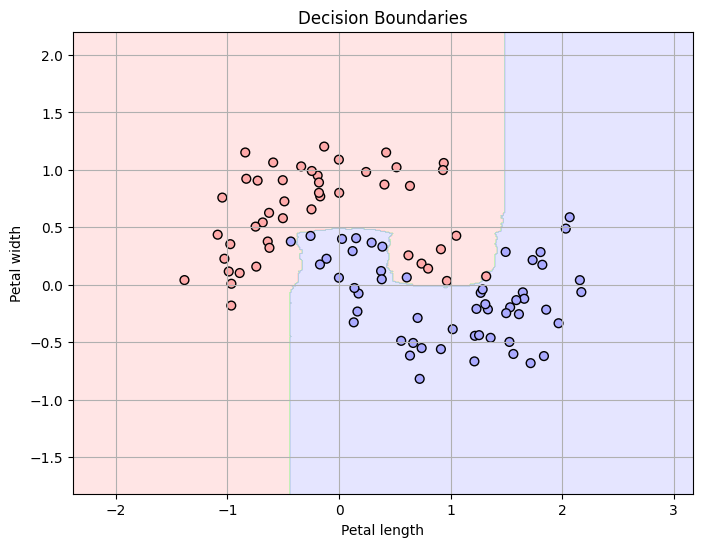

In [35]:
plot_decision_boundaries(X_test, y_test, bag_clf)

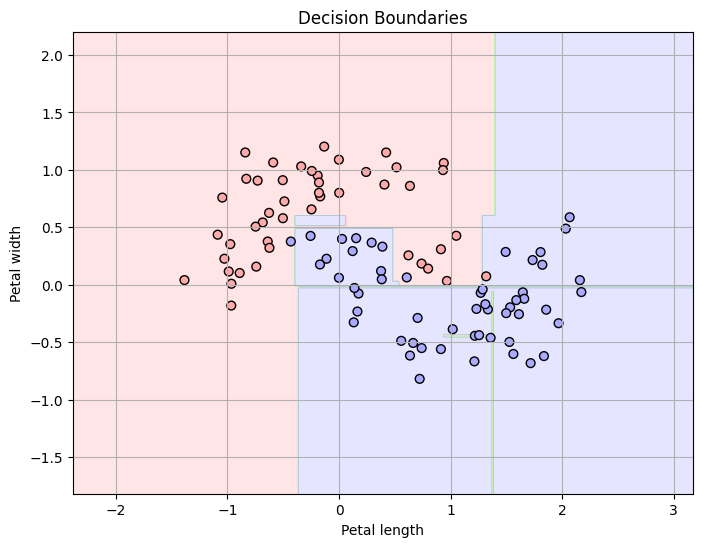

In [36]:
plot_decision_boundaries(X_test, y_test, tree_clf)

In [38]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=100,
    bootstrap=True,
    n_jobs=-1, # use all avaiable cores
    oob_score=True # use oob instances to validate model performance
)

bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.965

In [40]:
from sklearn.metrics import accuracy_score

y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.97

In [41]:
bag_clf.oob_decision_function_

array([[1.        , 0.        ],
       [0.85526316, 0.14473684],
       [0.00793651, 0.99206349],
       [0.04336735, 0.95663265],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.85564304, 0.14435696],
       [0.71989529, 0.28010471],
       [0.        , 1.        ],
       [0.9973822 , 0.0026178 ],
       [0.0052356 , 0.9947644 ],
       [0.99491094, 0.00508906],
       [0.00251256, 0.99748744],
       [0.05339806, 0.94660194],
       [0.99750623, 0.00249377],
       [0.22959184, 0.77040816],
       [0.81954887, 0.18045113],
       [0.02933985, 0.97066015],
       [0.89646465, 0.10353535],
       [0.29219144, 0.70780856],
       [1.        , 0.        ],
       [0.02512563, 0.97487437],
       [0.14025974, 0.85974026],
       [0.9974026 , 0.0025974 ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.21108179, 0.78891821],
       [1.        , 0.        ],
       [0.06753247, 0.93246753],
       [1.

Random Forests

In [43]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(
    n_estimators=500,
    max_leaf_nodes=16,
    n_jobs=-1   # use all avaible CPU cores
)

rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [45]:
from sklearn.datasets import load_iris

iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])

for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.09174940673259457
sepal width (cm) 0.023885460318322012
petal length (cm) 0.4485890891960468
petal width (cm) 0.43577604375303663
